# Importando bibliotecas

Matplotlib é uma biblioteca que é utilizada para a exibição de gráficos


Networkx é a biblioteca utilizada para a criação de grafos 

In [2]:
import matplotlib.pyplot as plt 
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Criando um grafo
Digite 'digraph' para criar um digrafo ou 'graph' para criar um grafo não dirigido

In [3]:
# variável que controla o tipo do grafo (dirigido ou não dirigido)
type = str(input())

# condição para a criação do grafo
if type.lower() == 'graph':
    
    # setup inicial de um grafo não dirigido pelo networkX
    G = nx.Graph()
elif type.lower() == 'digraph':
    
    # setup inicial de um grafo não dirigido pelo networkX
    G = nx.DiGraph()
    
else:
    
    # opção invalida
    print("Nenhuma opção foi escolhida")

graph


# Digite as arestas do grafo
## Automaticamente serão adicionados os vértices inseridos
OBS: Digite 'stop' para parar a inserção de dados

In [4]:
# loop para a criação de grafos pela entrada com teclado
while True:
    
    # Aresta com o seu respectivo número
    print("Aresta:" + str(len(G.edges())))
    
    # Vértice de saída da aresta
    print("Vértice Source")
    
    # Label do nó de saída da aresta
    node1 = input()
    
    # Caso o usuário informe "stop" o programa para de receber inputs
    if(node1 == 'stop'):
        break

    # Vértice de entrada da aresta
    print("Vértice Target")
    
    # Label do nó de entrada da aresta
    node2 = input()
    
    # Caso o usuário informe "stop" o programa para de receber inputs
    if(node2 == 'stop'):
        break
        
    # Peso da aresta informada
    print("Peso da aresta")
    wt = float(input())
    
    
    # Adicionando a aresta ao Grafo
    G.add_edge(node1, node2, weight=wt)


Aresta:0
Vértice Source
1
Vértice Target
2
Peso da aresta
3
Aresta:1
Vértice Source
stop


In [5]:
print(G.edges(), G.nodes())

[('1', '2')] ['1', '2']


# Exibição do Grafo
## Escolha o tipo do layout ('Aleatorio', 'Circular')

In [7]:
layout_type = str(input())
layout_type.lower()

# Variável que armazena a posição dos vértices baseado no layout
if layout_type == 'aleatorio':
    pos = nx.spring_layout(G, k=2)
elif layout_type == 'circular':
    pos = nx.circular_layout(G)

aleatorio


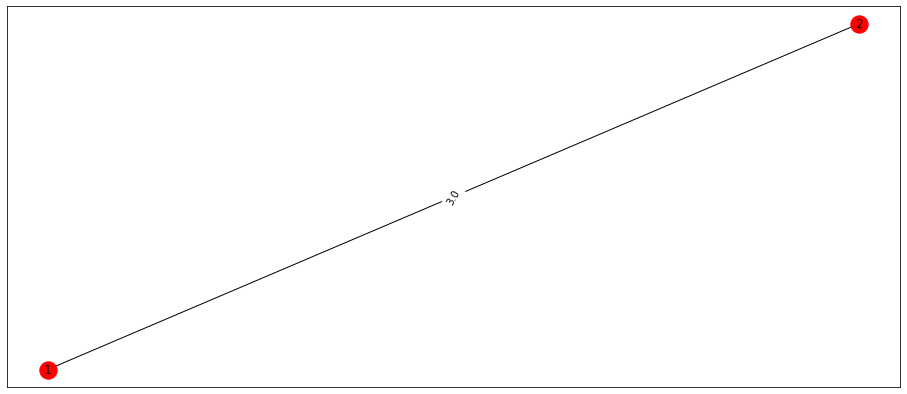

In [8]:
# Utilizado para definir o tamanho da exibição
fig = plt.figure(figsize=(16, 7))


# Variável que armazena o peso das arestas
labels = nx.get_edge_attributes(G,'weight')

# Função que desenha os nós Grafo
nx.draw_networkx_nodes(
    G, 
    pos, 
    node_color='r'
)

# Função que exibe as labels dos nós do grafo
nx.draw_networkx_labels(
    G, 
    pos
)

# Função que exibe os pesos das arestas do grafo
nx.draw_networkx_edge_labels(
    G, 
    pos, 
    font_size=10, 
    edge_labels=labels
)

# Função que desenha as arestas do grafo
nx.draw_networkx_edges(
    G, 
    pos, 
    width=1,
    length=7
)

plt.show()

# Exibição do número de Vértices 

In [21]:
# Função que retorna o número de vértices do Grafo
numV = len(list(G.nodes()))
print('Número de vertices: ',numV)

Número de vertices:  4


# Exibição do número de Arestas

In [22]:
# Função que retorna o número de arestas do Grafo
numA = len(list(G.edges()))
print('Número de arestas: ',numA)

Número de arestas:  3


# Exibição do número de Componentes

In [23]:
# Função que retorna o número de componentes do Grafo
# G.to_undirected() transforma grafos para não dirigidos forçadamente
numC = nx.number_connected_components(G.to_undirected())
print('Número de componentes: ',numC)

Número de componentes:  2


# Matriz de adjacência 

In [24]:
# Função que retorna a matriz de adjacência do Grafo
matrix = nx.adjacency_matrix(G)

In [25]:
# Representação da matriz de adjacência
print(matrix.todense())

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 6.]
 [0. 0. 6. 0.]]


# Pajek
## Código para geração de arquivo apartir do grafo acima (pode ser lido pelo pajek) 

In [34]:
# Função para escrever o Grafo em Pajek .net informando o grafo e o nome do arquivo em que deseja gravar o grafo
nx.write_pajek(G, "Grafo.net")

# Caminho mínimo

In [39]:
# Input para informar o nó pai da busca
print('Insira o nó de onde deseja começar: ')
StartNode = input()

# Input para informar o nó de chegada da busca
print('Insira o nó que deseja finalizar: ')
FinalNode = input()


Insira o nó de onde deseja começar: 
4
Insira o nó que deseja finalizar: 
origem


In [38]:
G.edges()

EdgeView([('4', '3'), ('4', 'destino'), ('3', '1'), ('2', '2'), ('2', '5'), ('origem', 'destino'), ('origem', '1'), ('1 2', 'um x')])

In [40]:
# Função que retorna uma lista de vértices do caminho
sp = nx.shortest_path(G,source = StartNode,target = FinalNode)

# Exibição do caminho mínimo
print(sp)

['4', 'destino', 'origem']


# Densidade de um grafo

In [41]:
# Função que calcula a densidade de um grafo
nx.density(G)

0.2222222222222222

# Cálculo do grau médio de um grafo (grau de entrada e saída)

In [42]:
# Função que calcula o grau de entrada e saída do grafo
nx.average_degree_connectivity(G)

{2: 2.0, 3: 1.3333333333333333, 1: 1.6666666666666667}

# Geração da lista de adjacência

In [43]:
# Foreach para exibir a representação da matriz de adjacência
for line in nx.generate_adjlist(G):
    print(line)

4 3 destino
3 1
2 2 5
5
origem destino 1
destino
1
1 2 um x
um x


In [87]:
V = G.adjacency()

In [88]:
print(V)

In [89]:
adjlist = []

for line in V:
    adjlist.append(line)

In [90]:
adjlist

[('4', {'3': {'weight': 1.0}, 'destino': {'weight': 1.0}}),
 ('3', {'4': {'weight': 1.0}, '1': {'weight': 5.0}}),
 ('2', {'2': {'weight': 1.0}, '5': {'weight': 6.0}}),
 ('5', {'2': {'weight': 6.0}}),
 ('origem', {'destino': {'weight': 3.0}, '1': {'weight': 3.0}}),
 ('destino', {'origem': {'weight': 3.0}, '4': {'weight': 1.0}}),
 ('1', {'origem': {'weight': 3.0}, '3': {'weight': 5.0}}),
 ('1 2', {'um x': {'weight': 3.0}}),
 ('um x', {'1 2': {'weight': 3.0}})]

In [99]:
adjlist[0][1]["destino"]

{'weight': 1.0}

In [103]:
for i in G.neighbors("1"):
    print(i)

origem
3


In [9]:
def BFS(G, node, visited, queue, bfslist):
    
    visited.append(node)
    queue.append(node)
    TPGraph = nx.DiGraph()
    TPGraph.add_node(node)
    
    while queue:
        print(queue)
        s = queue.pop(0)
        bfslist.append(s)

        for neighbour in G.neighbors(s):
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
                TPGraph.add_edge(s, neighbour)
                
    return TPGraph

In [10]:
visited = []
queue = []
bfslist = []

In [12]:
TPGraph = BFS(G, "1", visited, queue, bfslist)

['1']
['2']


In [13]:
bfslist

['6', '1', '2']

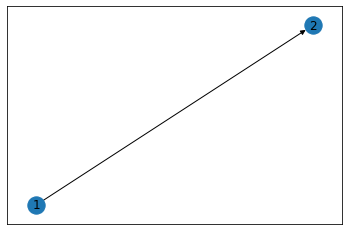

In [14]:
posi = nx.spring_layout(TPGraph)

nx.draw_networkx_nodes(TPGraph, posi)
nx.draw_networkx_edges(TPGraph, posi)
nx.draw_networkx_labels(TPGraph, posi)
plt.show()